Sinusoidal Dataset Prediction for Practice.
Coded by Ari Sukma N

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print('np.__version__:', np.__version__)
print('pd.__version__:', pd.__version__)
print('matplotlib.__version__:', matplotlib.__version__)
print('sklearn.__version__:', sklearn.__version__)
print('torch.__version__:', torch.__version__)
print('tf.__version__:', tf.__version__)

np.__version__: 1.21.5
pd.__version__: 1.3.5
matplotlib.__version__: 3.5.1
sklearn.__version__: 0.22.2.post1
torch.__version__: 1.11.0+cpu
tf.__version__: 2.2.0


In [2]:
#make_data
x = np.linspace(0, 314, 158)*0.05
xmax = max(x)
xmean = np.mean(x)
x = np.array([[t] for t in x])
y = np.array([np.sin(t) + 0.3*np.random.random(1) for t in x]).reshape(-1)
x = (x-xmean)/xmax

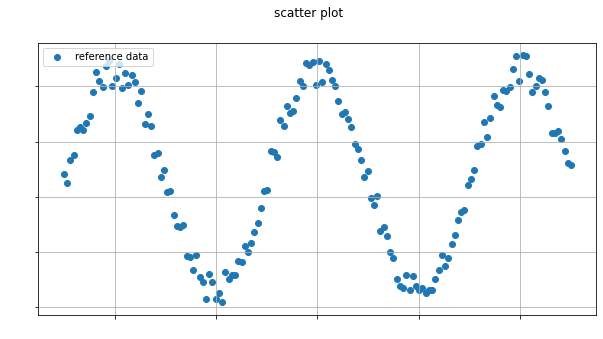

In [3]:
def viz(x,y, a, b):
    plt.figure(figsize=[10,5])
    plt.scatter(x,y, label='reference data')
    plt.xticks(color = "white")
    plt.yticks(color = "white")
    if len(a):
        plt.scatter(a,b, label='scatter data', c="#1C2833")
    plt.grid()
    plt.legend(loc='upper left')
    plt.suptitle('scatter plot')
    plt.show()


viz(x,y,[], [])

TRAIN DATA


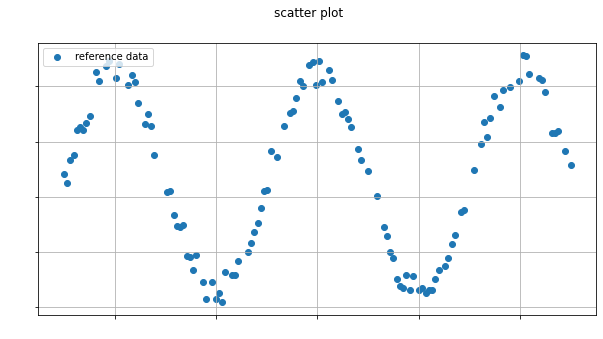

TEST_DATA


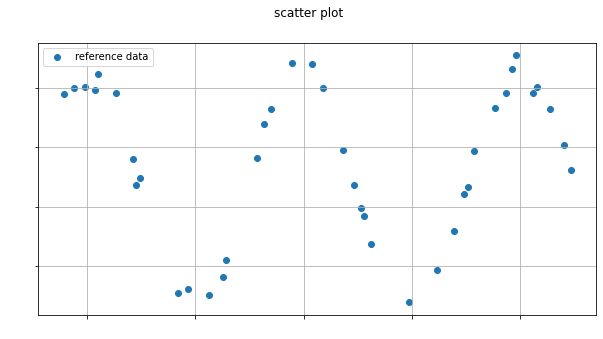

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=42)
print("TRAIN DATA")
viz(x_train, y_train, [], [])
print("TEST_DATA")
viz(x_test, y_test, [], [])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_46 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_47 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_48 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_49 (Dense)             (None, 20)                620       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)               

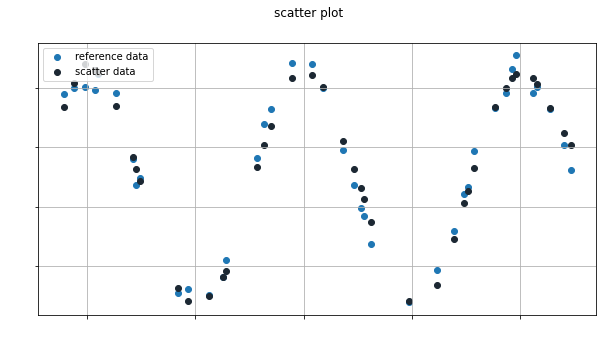

In [15]:
#KERAS Way

model = keras.Sequential()
model.add(layers.Dense(30,  input_shape=[1,],activation='relu'))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.LeakyReLU(alpha=0.05))
model.add(layers.Dense(1))

optimizer = tf.keras.optimizers.SGD(0.03, momentum=0.2)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
model.summary()
history = model.fit(x_train, y_train, epochs=500, verbose=1)
df_history = pd.DataFrame(history.history)
df_history['epoch'] = history.epoch
df_history.tail()
y_pred = model.predict(x_test)

a = model.layers[0].get_weights()[0][0]
b = model.layers[0].get_weights()[1][0]
print('Weight = {}, Bias = {}'.format(a, b))
print('RMSE:', (mean_squared_error(y_test, y_pred))**0.5)
print('R2_Score', r2_score(y_test, y_pred))
viz(x_test,y_test, x_test, y_pred)
